In [1]:
#synthetic minority over-sampling technique

In [2]:
from sklearn.datasets import make_classification

In [13]:
X,Y=make_classification(n_samples=1000,n_redundant=0,n_features=2,
                        n_clusters_per_class=1,
                   weights=[0.90],random_state=654)

In [47]:
X

array([[-1.75050476,  1.7729109 ],
       [ 2.01039142, -1.21323642],
       [-0.44741761,  0.65582382],
       ...,
       [-0.68830421,  0.77601891],
       [-2.564062  ,  2.07751759],
       [-2.3001383 ,  2.11973643]])

In [15]:
Y

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [16]:
import pandas as pd
xdf=pd.DataFrame(X,columns=['c1','c2'])
xdf

,c1,c2
0,-1.750505,1.772911
1,2.010391,-1.213236
2,-0.447418,0.655824
3,-2.359039,1.510345
4,-0.882900,1.274575
...,...,...
995,-2.118353,1.057767
996,-1.419369,1.045782
997,-0.688304,0.776019
998,-2.564062,2.077518


In [19]:
ydf=pd.DataFrame(Y,columns=['target'])
ydf

,target
0,0
1,1
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [20]:
ydf['target'].value_counts()

0    898
1    102
Name: target, dtype: int64

In [21]:
df=pd.concat([xdf,ydf],axis=1)

In [22]:
df

,c1,c2,target
0,-1.750505,1.772911,0
1,2.010391,-1.213236,1
2,-0.447418,0.655824,0
3,-2.359039,1.510345,0
4,-0.882900,1.274575,0
...,...,...,...
995,-2.118353,1.057767,0
996,-1.419369,1.045782,0
997,-0.688304,0.776019,0
998,-2.564062,2.077518,0


In [28]:
df.describe()

,c1,c2,target
count,1000.000000,1000.000000,1000.0000
mean,-0.817574,0.818220,0.1020
std,1.273697,0.881011,0.3028
min,-4.294959,-3.818524,0.0000
25%,-1.674183,0.492192,0.0000
50%,-0.900099,0.936276,0.0000
75%,-0.032501,1.357380,0.0000
max,5.111881,2.923275,1.0000


In [27]:
df['target'].value_counts()

0    898
1    102
Name: target, dtype: int64

In [23]:
import matplotlib.pyplot as plt

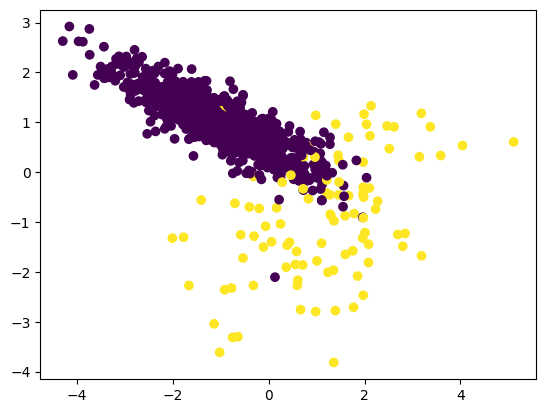

In [26]:
plt.scatter(df['c1'],df['c2'],c=df['target'],)

In [29]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 226.0/226.0 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
smote_model=SMOTE()

In [34]:
x,y=smote_model.fit_resample(df[['c1','c2']],df['target'])

In [35]:
x.shape

(1796, 2)

In [36]:
y.shape

(1796,)

In [37]:
y==0

0        True
1       False
2        True
3        True
4        True
        ...  
1791    False
1792    False
1793    False
1794    False
1795    False
Name: target, Length: 1796, dtype: bool

In [38]:
y[y==0]

0      0
2      0
3      0
4      0
5      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: target, Length: 898, dtype: int32

In [41]:
len(y[y==0])

898

In [42]:
len(y[y==1])

898

In [46]:
x

,c1,c2
0,-1.750505,1.772911
1,2.010391,-1.213236
2,-0.447418,0.655824
3,-2.359039,1.510345
4,-0.882900,1.274575
...,...,...
1791,0.823100,-1.960504
1792,-0.823375,-0.613047
1793,1.977014,-1.338224
1794,2.534137,-1.471689


In [51]:
fdf1=pd.DataFrame(x)
fdf2=pd.DataFrame(y,columns=['target'])

In [52]:
fdf1

,c1,c2
0,-1.750505,1.772911
1,2.010391,-1.213236
2,-0.447418,0.655824
3,-2.359039,1.510345
4,-0.882900,1.274575
...,...,...
1791,0.823100,-1.960504
1792,-0.823375,-0.613047
1793,1.977014,-1.338224
1794,2.534137,-1.471689


In [53]:
fdf2

,target
0,0
1,1
2,0
3,0
4,0
...,...
1791,1
1792,1
1793,1
1794,1


In [54]:
fdf2.value_counts()

target
0         898
1         898
dtype: int64

In [57]:
fdf=pd.concat([fdf1,fdf2],axis=1)

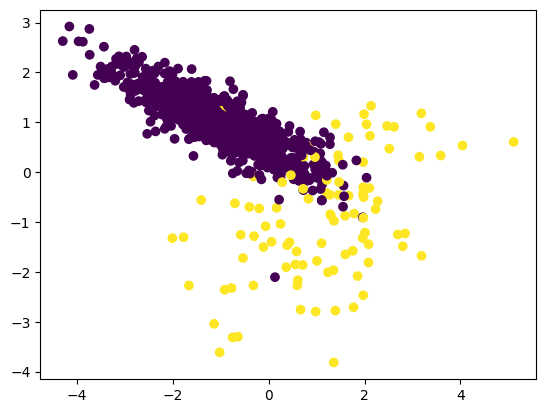

In [55]:
plt.scatter(df['c1'],df['c2'],c=df['target'])

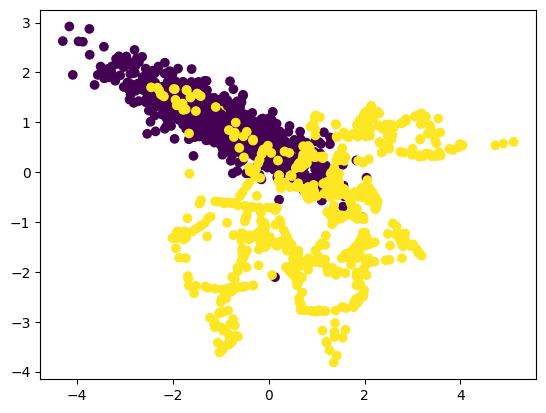

In [58]:
plt.scatter(fdf['c1'],fdf['c2'],c=fdf['target'])

In [63]:
df[df['target']==1].describe()

,c1,c2,target
count,102.000000,102.000000,102.0
mean,1.008529,-0.815461,1.0
std,1.408559,1.271580,0.0
min,-2.461840,-3.818524,1.0
25%,0.088190,-1.671172,1.0
50%,1.225542,-0.837840,1.0
75%,1.974307,0.284994,1.0
max,5.111881,1.706382,1.0


In [66]:
fdf[fdf['target']==1].describe()

,c1,c2,target
count,898.000000,898.000000,898.0
mean,0.908065,-0.845610,1.0
std,1.358918,1.218199,0.0
min,-2.461840,-3.818524,1.0
25%,-0.135967,-1.689045,1.0
50%,1.067644,-0.893992,1.0
75%,1.955972,0.190079,1.0
max,5.111881,1.706382,1.0
